# Plot the initial distributions of *passive temperature* and *CFC-11*

In [1]:
clear
homedir = getenv('HOME');
workdir = getenv('WORK');
scradir = getenv('SCRATCH');
campdir = getenv('CAMP');
addpath(genpath([homedir '/work_MOM']));
addpath(genpath([homedir '/mytoolbox']));
addpath(genpath([homedir '/MyFuncs']));
% 
grid_dir = [workdir '/MOM6_exp/swm_spunup/'];  
[grid, ~, ~] = read_grid_MOM([grid_dir '']); 

In [2]:
IC_pt_fnm = [workdir '/MOM6_OUT/forc_uvh_sm17/ICs/trac_init_pt.nc'];
IC_cfc_fnm = [workdir '/MOM6_OUT/forc_uvh_sm17/ICs/trac_CFC11_1024.nc'];
pt_fnm =  [campdir '/mom_ptemp/sol_tr_pt/tr__0021_120_00.nc'];
cfc_fnm = [campdir '/mom_ptemp/sol_tr_cfc11_off/tr__0021_120_00.nc'];

ds_pt_IC = ncstruct(IC_pt_fnm);
ds_cfc_IC = ncstruct(IC_cfc_fnm);
ds_pt = ncstruct(pt_fnm);
ds_cfc = ncstruct(cfc_fnm);

In [3]:
% -- save data
savefnm = [homedir '/work_MOM/data_for_figure/data_fig2.mat'];
save(savefnm);

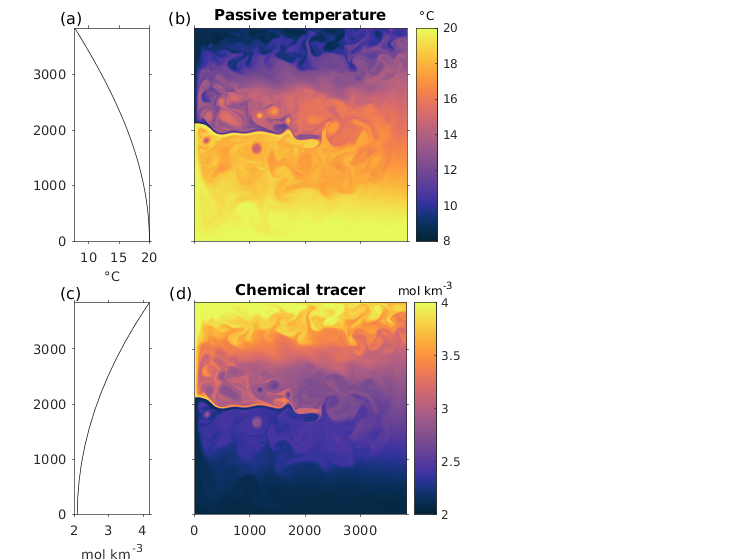

In [4]:
[x, y] = deal(grid.lonh, grid.lath);

x1 = 0.1; y1 = 0.57; w1 = 0.1; h1 = 0.38;
x2 = x1+w1+0.05; y2 = y1; w2 = h1; h2 = h1;
% 
x3 = x1; y3 = 0.08; w3 = w1; h3 = h1;
x4 = x2; y4 = y3; w4 = w2; h4 = h2;

pos1 = [x1 y1 w1 h1];
pos2 = [x2 y2 w2 h2];
pos3 = [x3 y3 w3 h3];
pos4 = [x4 y4 w4 h4];

font = 'DejaVu Sans';
figure('DefaultTextFontName', font, 'DefaultAxesFontName', font);
% -- 1
ax = subplot('Position',pos1);
c1d_pt = ds_pt_IC.tr1(1,:,1);
plot(c1d_pt, y, 'k-')
set(ax,'tickdir','out','YLim',[0 y(end)]);
xlabel('\circC','fontsize',10)
hd = subplotlabel(ax,'(a)','location','northwestoutside','offset',[-0.2 0],'fontsize',12);

% -- 2
ax(2) = subplot('Position',pos2);
imagescn(x, y, ds_pt.tr1(:,:,1)');
axis square
set(ax(2),'tickdir','out','xticklabel','','yticklabel','');
caxis([8 20]);
cmocean('thermal')
cb = colorbar;
cb.Title.String = '\circC';
hd(2) = subplotlabel(ax(2),'(b)','location','northwestoutside','offset',[-0.12 0],'fontsize',12);
title('Passive temperature');

% -- 3
ax(3) = subplot('Position',pos3);
c1d_cfc = ds_cfc_IC.tr1(1,:,1);
plot(c1d_cfc, y, 'k-')
set(ax(3),'tickdir','out','YLim',[0 y(end)]);
xlabel('mol km^{-3}','fontsize',10)
hd(3) = subplotlabel(ax(3),'(c)','location','northwestoutside','offset',[-0.2 0],'fontsize',12);

% -- 4
ax(4) = subplot('Position',pos4);
imagescn(x, y, ds_cfc.tr1(:,:,1)');
axis square
set(ax(4),'tickdir','out','yticklabel','');
caxis([2 4]);
cmocean('thermal')
cb = colorbar;
cb.Title.String = 'mol km^{-3}';
hd(4) = subplotlabel(ax(4),'(d)','location','northwestoutside','offset',[-0.12 0],'fontsize',12);
title('Chemical tracer');

% --
set(gcf,'PaperPositionMode','auto'); 
% 
fignm = [homedir '/work_MOM/figures/fig2'];
% exportgraphics(gcf,[fignm '.pdf'], 'BackgroundColor','white','ContentType','vector')